In [1]:
import cv2
import os
from PIL import Image
import numpy as np 
import pandas as pd 

image_directory = 'datasets/'
no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')

In [2]:
img = cv2.imread(image_directory+ "yes/"+ "y652.jpg")
img.shape

(324, 278, 3)

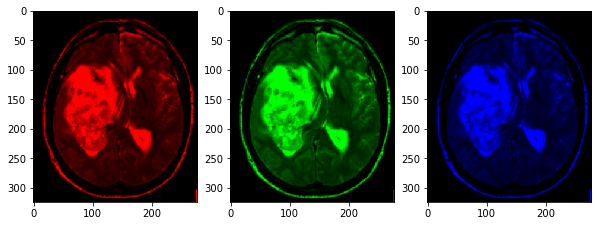

In [3]:
import imageio
import matplotlib.pyplot as plt
image = imageio.imread(image_directory+ "yes/"+ "y652.jpg")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

red_image = image.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

green_image = image.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

blue_image = image.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

axes[0].imshow(red_image)
axes[1].imshow(green_image)
axes[2].imshow(blue_image)


In [4]:
no_img_label = []
no_img_width = []
no_img_height = []

for i, image_name in enumerate(no_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        no_img_label.append(image_name.split(".")[0])

        img = cv2.imread(image_directory+ "no/"+ image_name)
        no_img_width.append(img.shape[0])
        no_img_height.append(img.shape[1])

In [5]:
no_info = {"image_label":no_img_label, "image_width":no_img_width, "image_height":no_img_height}
no_images_info_df = pd.DataFrame(no_info)
no_images_info_df

,image_label,image_width,image_height
0,no0,630,630
1,no1,198,150
2,no10,225,225
3,no100,217,232
4,no1000,194,259
...,...,...,...
1495,no995,221,228
1496,no996,225,225
1497,no997,225,225
1498,no998,225,225


In [6]:
no_images_info_df.describe()

,image_width,image_height
count,1500.000000,1500.000000
mean,306.702667,299.980667
std,141.918226,148.211275
min,168.000000,150.000000
25%,225.000000,214.000000
50%,238.000000,227.000000
75%,400.000000,368.000000
max,1080.000000,1920.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263FA62FDA0>,
      dtype=object)

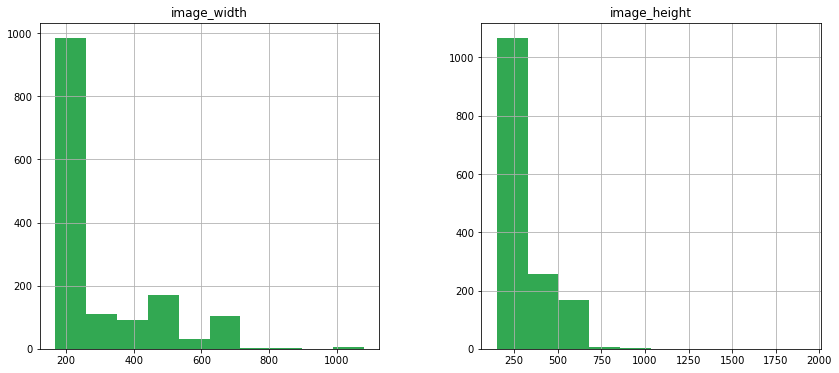

In [7]:
no_images_info_df[["image_width", "image_height"]].hist(figsize=(14,6), bins=10, color='#32a852') 

In [8]:
yes_img_label = []
yes_img_width = []
yes_img_height = []

for i, image_name in enumerate(yes_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        yes_img_label.append(image_name.split(".")[0])

        img = cv2.imread(image_directory+ "yes/"+ image_name)
        yes_img_width.append(img.shape[0])
        yes_img_height.append(img.shape[1])
        
yes_info = {"image_label":yes_img_label, "image_width":yes_img_width, "image_height":yes_img_height}
yes_images_info_df = pd.DataFrame(yes_info)
yes_images_info_df

,image_label,image_width,image_height
0,y0,348,287
1,y1,630,587
2,y10,879,766
3,y100,630,630
4,y1000,336,264
...,...,...,...
1495,y995,334,283
1496,y996,354,303
1497,y997,348,297
1498,y998,1200,1059


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263FA8FFEF0>,
      dtype=object)

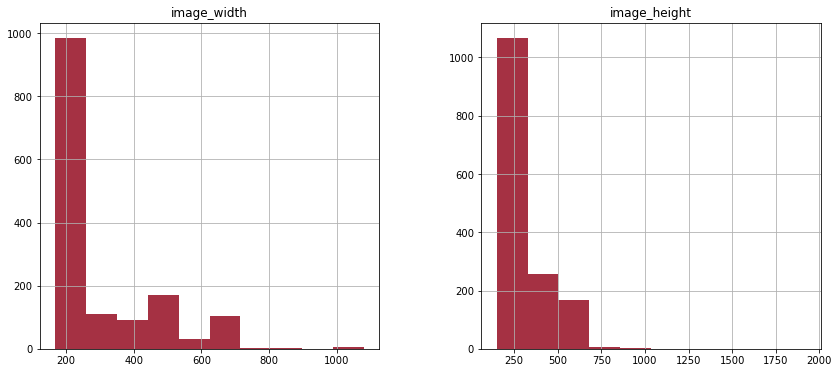

In [9]:
no_images_info_df[["image_width", "image_height"]].hist(figsize=(14,6), bins=10, color='#A53143')

In [10]:
yes_images_info_df.describe()

,image_width,image_height
count,1500.000000,1500.000000
mean,398.853333,350.455333
std,206.095229,193.916053
min,167.000000,175.000000
25%,294.000000,247.500000
50%,342.000000,283.000000
75%,380.000000,353.000000
max,1427.000000,1275.000000


In [11]:
import cv2 
import os
import tensorflow as tf 
from PIL import Image
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D,
     Activation, Dropout, Flatten, Dense)
from tensorflow.keras.utils import to_categorical

In [12]:
image_directory = 'datasets/'
no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')

dataset=[]
label=[]

INPUT_SIZE=64

for i, image_name in enumerate(no_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        image = cv2.imread(image_directory+"no/"+image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i, image_name in enumerate(yes_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        image = cv2.imread(image_directory+"yes/"+image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [13]:
# Plotting Accuracy and Loss of the model 
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()


## Model 01: Categorical Cross Entropy

In [14]:
dataset= np.array(dataset) 
label= np.array(label)

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Categorical Cross Entropy 
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [15]:
# Model Building
model_1 = Sequential()

# first layer
model_1.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# 1st hidden layer
model_1.add(Conv2D(filters= 32, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# 2nd hidden layer
model_1.add(Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model_1.add(Flatten())
model_1.add(Dense(64))
model_1.add(Activation("relu"))
model_1.add(Dropout(0.5))

#Categorical Cross Entropy = 2, softmax   
model_1.add(Dense(2))
model_1.add(Activation("softmax"))
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [17]:
model_1.fit(x_train, y_train, batch_size=32, verbose=True, epochs=10,
          validation_data=(x_test, y_test), shuffle=False)

model_1.save("BrainTumorCategorical10Epochs.h5")

Epoch 1/10
75/75 [==============================] - 1s 11ms/step - loss: 7.8144 - accuracy: 0.5783 - val_loss: 0.5029 - val_accuracy: 0.7567
Epoch 2/10
75/75 [==============================] - 1s 8ms/step - loss: 0.5502 - accuracy: 0.7221 - val_loss: 0.5170 - val_accuracy: 0.7333
Epoch 3/10
75/75 [==============================] - 1s 8ms/step - loss: 0.5097 - accuracy: 0.7467 - val_loss: 0.3961 - val_accuracy: 0.8283
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.4354 - accuracy: 0.8012 - val_loss: 0.3435 - val_accuracy: 0.8533
Epoch 5/10
75/75 [==============================] - 1s 8ms/step - loss: 0.3567 - accuracy: 0.8325 - val_loss: 0.3418 - val_accuracy: 0.8300
Epoch 6/10
75/75 [==============================] - 1s 8ms/step - loss: 0.3287 - accuracy: 0.8487 - val_loss: 0.2859 - val_accuracy: 0.8550
Epoch 7/10
75/75 [==============================] - 1s 8ms/step - loss: 0.2909 - accuracy: 0.8558 - val_loss: 0.2607 - val_accuracy: 0.8817
Epoch 8/10
75/75 [=

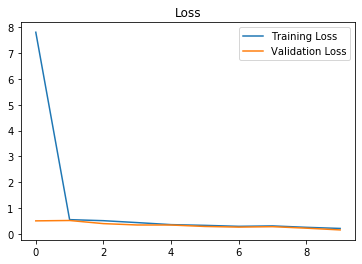

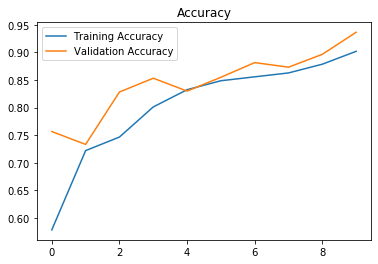

In [18]:
history_1 = model_1.history.history
plot_metrics(history_1)


## Model 02: Binary Cross Entropy

In [19]:
# Binary Cross Entropy with Sigmoid Function. 
dataset= np.array(dataset) 
label= np.array(label)

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [20]:
# Model Building
model_2 = Sequential()

# first layer
model_2.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# 1st hidden layer
model_2.add(Conv2D(filters= 32, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# 2nd hidden layer
model_2.add(Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(Activation("relu"))
model_2.add(Dropout(0.5))

# Binary Cross Entropy = 1, sigmoid 
model_2.add(Dense(1))
model_2.add(Activation("sigmoid"))
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model_2.fit(x_train, y_train, batch_size=32, verbose=True, epochs=10,
          validation_data=(x_test, y_test), shuffle=False)

In [21]:
model_2.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [22]:
model_2.fit(x_train, y_train, batch_size=32, verbose=True, epochs=10,
          validation_data=(x_test, y_test), shuffle=False)

model_2.save("BrainTumor10Epochs.h5")

Epoch 1/10
75/75 [==============================] - 1s 10ms/step - loss: 0.5644 - accuracy: 0.7083 - val_loss: 0.5219 - val_accuracy: 0.7400
Epoch 2/10
75/75 [==============================] - 1s 8ms/step - loss: 0.4247 - accuracy: 0.8138 - val_loss: 0.5173 - val_accuracy: 0.7800
Epoch 3/10
75/75 [==============================] - 1s 8ms/step - loss: 0.3524 - accuracy: 0.8554 - val_loss: 0.4011 - val_accuracy: 0.8017
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.2818 - accuracy: 0.8783 - val_loss: 0.2839 - val_accuracy: 0.8650
Epoch 5/10
75/75 [==============================] - 1s 8ms/step - loss: 0.2358 - accuracy: 0.9092 - val_loss: 0.2946 - val_accuracy: 0.8583
Epoch 6/10
75/75 [==============================] - 1s 8ms/step - loss: 0.1766 - accuracy: 0.9321 - val_loss: 0.1806 - val_accuracy: 0.9433
Epoch 7/10
75/75 [==============================] - 1s 8ms/step - loss: 0.1300 - accuracy: 0.9575 - val_loss: 0.1443 - val_accuracy: 0.9533
Epoch 8/10
75/75 [=

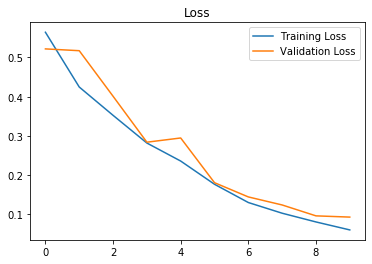

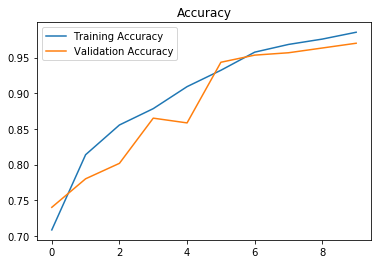

In [23]:
history_2 = model_2.history.history
plot_metrics(history_2)
